Las variables contenidas en este conjunto de datos son:

**InvoiceNo**: Número de factura. Un número entero de 6 dígitos asignado de forma única a cada transacción. Si este código comienza con la letra 'c', indica una cancelación.

**StockCode**: Código de producto. Un número entero de 5 dígitos asignado de forma única a cada producto distinto.

**Description**: Nombre del producto.

**Quantity**: Cantidades de cada producto por transacción.

**InvoiceDate**: Fecha y hora de la factura. El día y la hora en que se generó cada transacción.

**UnitPrice**: Precio por unidad. Precio del producto por unidad en libras esterlinas.

**CustomerID**: Número de cliente. Un número entero de 5 dígitos asignado de forma única a cada cliente.

**Country**: Nombre del país. El nombre del país donde reside cada cliente.

**Objetivo**: Comprender el funcionamiento del algoritmo de K-Means aplicándolo en un conjunto de datos real de comercio electrónico con el fin de identificar perfiles de clientes y optimizar las estrategias de marketing para incrementar las ganancias anuales. Recuerde que el ciclo de vida de un proyecto no es lineal, requiere ir y volver.


1.	Comenten el conjunto de datos y discuta las razones para utilizar el algoritmo de K-Means y cómo puede ayudar a la empresa.

2.	Cargue el conjunto de datos de transacciones y realizar un análisis exploratorio de los datos para entender su estructura y las variables disponibles. Explique la estructura y utilidad del dataset.

3.	Limpie y transforme los datos según sea necesario. Esto puede implicar la eliminación de valores faltantes, la conversión de variables categóricas en numéricas, la creación de nuevas variables (por ejemplo, total de ventas por cliente), y la normalización o estandarización de las variables.

4.	Visualice los datos y las relaciones entre las variables. Esto puede incluir histogramas, gráficos de dispersión, y gráficos de caja. Justifique sus decisiones.

5.	Aplique el algoritmo al conjunto de datos procesado. Experimente con diferentes números de clústeres (k) y observe cómo cambian los resultados. 

6.	Interprete los clústeres encontrados en el contexto del problema de negocio. ¿Cómo se diferencian los clústeres entre sí? ¿Cómo se pueden utilizar estos clústeres para informar las decisiones de marketing?

7.	Visualice los clústeres en relación con las variables clave utilizando gráficos de dispersión y gráficos de barras.

8.	Elabore un párrafo que explique las principales decisiones, sobre todo del paso 5, y los pasos seguidos. Investigue que utilidad tendría utilizar PCA y que aporte podría significar para el negocio.


In [1]:
%pip install pandas numpy matplotlib seaborn scikit-learn

  Using cached pandas-2.0.1-cp311-cp311-win_amd64.whl (10.6 MB)
  Using cached matplotlib-3.7.1-cp311-cp311-win_amd64.whl (7.6 MB)
  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)
                                              0.0/8.3 MB ? eta -:--:--
                                              0.0/8.3 MB 660.6 kB/s eta 0:00:13
     ---                                      0.6/8.3 MB 5.6 MB/s eta 0:00:02
     -----                                    1.2/8.3 MB 7.4 MB/s eta 0:00:01
     --------                                 1.7/8.3 MB 8.4 MB/s eta 0:00:01
     -----------                              2.3/8.3 MB 9.1 MB/s eta 0:00:01
     -------------                            2.8/8.3 MB 9.4 MB/s eta 0:00:01
     ----------------                         3.3/8.3 MB 9.7 MB/s eta 0:00:01
     ------------------                       3.9/8.3 MB 10.0 MB/s eta 0:00:01
     ---------------------                    4.5/8.3 MB 10.2 MB/s eta 0:00:01
     ------------------------       

In [10]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [5]:
online_retail_df = pd.read_csv("OnlineRetail.csv", encoding="unicode_escape")

In [21]:
online_retail_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,VentaTotal,year,month,day,hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,1,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,1,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,2011,12,9,12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011,12,9,12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011,12,9,12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011,12,9,12


In [15]:
# Agregar venta total

online_retail_df["VentaTotal"] = online_retail_df["Quantity"] * online_retail_df["UnitPrice"]

In [17]:
online_retail_df['InvoiceDate'] = pd.to_datetime(online_retail_df['InvoiceDate'], format='%d-%m-%Y %H:%M')

In [19]:
online_retail_df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
VentaTotal            float64
dtype: object

In [20]:
# separate InvoiceDate datetime64 data into columns

online_retail_df['year'] = online_retail_df['InvoiceDate'].dt.year

online_retail_df['month'] = online_retail_df['InvoiceDate'].dt.month

online_retail_df['day'] = online_retail_df['InvoiceDate'].dt.day

online_retail_df['hour'] = online_retail_df['InvoiceDate'].dt.hour


online_retail_df['day'] = online_retail_df['InvoiceDate'].dt.


In [25]:
online_retail_df = online_retail_df.dropna()

In [30]:
online_retail_df.CustomerID.unique().size

4372

'count': Count the number of non-null values.
'sum': Compute the sum of values.
'mean': Compute the mean (average) of values.
'median': Compute the median of values.
'min': Find the minimum value.
'max': Find the maximum value.
'std': Compute the standard deviation.
'var': Compute the variance.
'first': Get the first value.
'last': Get the last value.

In [32]:
online_retail_df.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,VentaTotal,year,month,day,hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3,2010,12,1,8


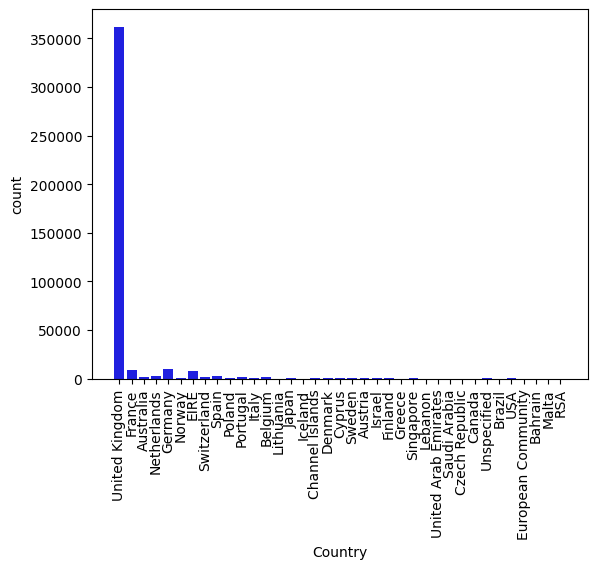

In [41]:
from numpy import size, spacing


sns.countplot(data=online_retail_df, x='Country', color='blue')
plt.xticks(rotation=90)
plt.autoscale(enable=True, axis='x', tight=None)
plt.show()

In [42]:
online_retail_df.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,VentaTotal,year,month,day,hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3,2010,12,1,8


In [44]:
agregation = {'Quantity': 'sum', 'UnitPrice': 'sum','VentaTotal': 'sum','Country': 'first', 'year': 'first','month': 'first','day': 'first','hour': 'first',}

online_retail_grouped_df = online_retail_df.drop(["StockCode", "Description", "InvoiceDate"], axis=1)

online_retail_grouped_df = online_retail_grouped_df.groupby(['InvoiceNo', 'CustomerID']).agg(agregation)

In [45]:
online_retail_grouped_df.head()

,,Quantity,UnitPrice,VentaTotal,Country,year,month,day,hour
InvoiceNo,CustomerID,,,,,,,,
536365,17850.0,40,27.37,139.12,United Kingdom,2010,12,1,8
536366,17850.0,12,3.70,22.20,United Kingdom,2010,12,1,8
536367,13047.0,83,58.24,278.73,United Kingdom,2010,12,1,8
536368,13047.0,15,19.10,70.05,United Kingdom,2010,12,1,8
536369,13047.0,3,5.95,17.85,United Kingdom,2010,12,1,8


In [48]:
online_retail_grouped_df = online_retail_grouped_df.reset_index()

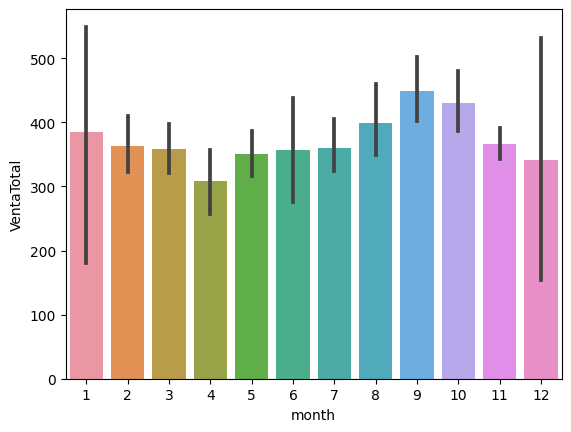

In [50]:
# CustomerID to string
#online_retail_grouped_df['CustomerID'] = online_retail_grouped_df['CustomerID'].astype(str)

sns.barplot(x='month',  y='VentaTotal', data=online_retail_grouped_df)

plt.show()

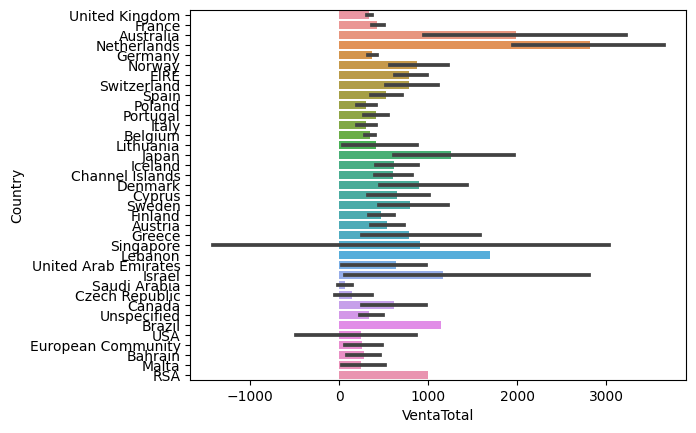

In [52]:
sns.barplot(x='VentaTotal',  y='Country', data=online_retail_grouped_df)

plt.show()